## What Is Regression?

Regression is a statistical method used in finance, investing, and other disciplines that attempts to determine the strength and character of the relationship between one dependent variable (usually denoted by Y) and a series of other variables (known as independent variables).

## Regression Explained

The two basic types of regression are simple linear regression and multiple linear regression, although there are non-linear regression methods for more complicated data and analysis. Simple linear regression uses one independent variable to explain or predict the outcome of the dependent variable Y, while multiple linear regression uses two or more independent variables to predict the outcome.

**The general form of each type of regression is:**

Simple linear regression: `Y = a + bX + u`

Multiple linear regression: `Y = a + b1X1 + b2X2 + b3X3 + ... + btXt + u`

Where:

Y = the variable that you are trying to predict (dependent variable).

X = the variable that you are using to predict Y (independent variable).

a = the intercept.

b = the slope.

u = the regression residual.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("data/cost_revenue-dirty.csv")
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,"$110,000","$11,000,000","$10,000,000"
1,5140,5/9/1916,Intolerance,"$385,907",$0,$0
2,5230,12/24/1916,"20,000 Leagues Under the Sea","$200,000","$8,000,000","$8,000,000"
3,5299,9/17/1920,Over the Hill to the Poorhouse,"$100,000","$3,000,000","$3,000,000"
4,5222,1/1/1925,The Big Parade,"$245,000","$22,000,000","$11,000,000"


In [3]:
df["Production Budget ($)"].isna().value_counts()

False    5391
Name: Production Budget ($), dtype: int64

In [4]:
df.dtypes

Rank                      int64
Release Date             object
Movie Title              object
Production Budget ($)    object
Worldwide Gross ($)      object
Domestic Gross ($)       object
dtype: object

In [5]:
# Change "Production Budget ($)" and "Worldwide Gross ($)" to int
df["Production Budget ($)"] = df["Production Budget ($)"].str.replace("[\$\,]", "").astype(int)
df["Worldwide Gross ($)"] = df["Worldwide Gross ($)"].str.replace("[\$\,]", "").astype(int)
df["Domestic Gross ($)"] = df["Domestic Gross ($)"].str.replace("[\$\,]", "").astype(int)
df.head()

,Rank,Release Date,Movie Title,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
0,5293,8/2/1915,The Birth of a Nation,110000,11000000,10000000
1,5140,5/9/1916,Intolerance,385907,0,0
2,5230,12/24/1916,"20,000 Leagues Under the Sea",200000,8000000,8000000
3,5299,9/17/1920,Over the Hill to the Poorhouse,100000,3000000,3000000
4,5222,1/1/1925,The Big Parade,245000,22000000,11000000


In [6]:
df.describe()

,Rank,Production Budget ($),Worldwide Gross ($),Domestic Gross ($)
count,5391.000000,5.391000e+03,5.391000e+03,5.391000e+03
mean,2696.000000,3.111374e+07,8.885542e+07,4.123552e+07
std,1556.391981,4.052380e+07,1.684578e+08,6.602935e+07
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00
25%,1348.500000,5.000000e+06,3.865206e+06,1.330902e+06
50%,2696.000000,1.700000e+07,2.745045e+07,1.719220e+07
75%,4043.500000,4.000000e+07,9.645446e+07,5.234369e+07
max,5391.000000,4.250000e+08,2.783919e+09,9.366622e+08


In [7]:
df.to_csv("clean_cost_revenue.csv")

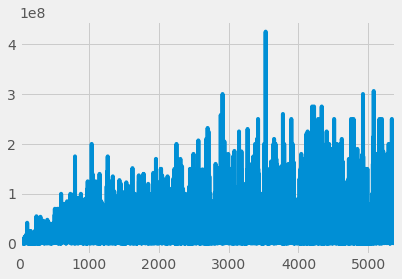

In [29]:
df["Production Budget ($)"].plot(kind="line")

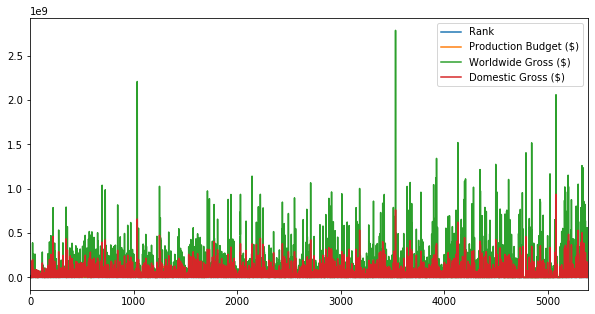

In [9]:
df.plot(figsize=(10,5))

In [10]:
# Create X and y 
X = pd.DataFrame(df["Production Budget ($)"])
y = pd.DataFrame(df["Worldwide Gross ($)"])

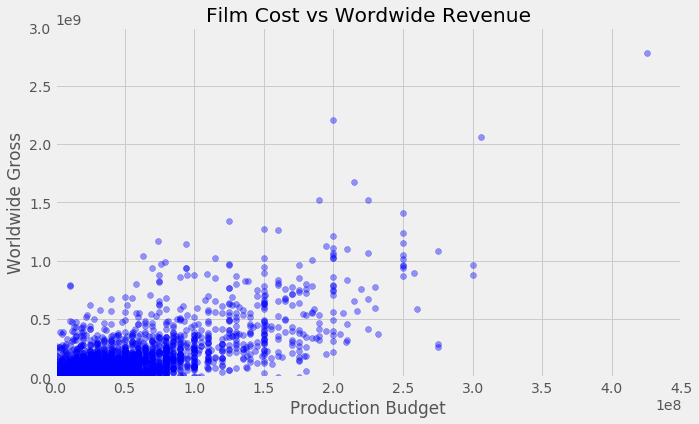

In [24]:
plt.figure(figsize=(10,6))
plt.scatter(X, y, alpha=0.4, c='blue')
plt.title("Film Cost vs Wordwide Revenue")
plt.xlabel("Production Budget")
plt.ylabel("Worldwide Gross")
plt.xlim(0, 450000000)
plt.ylim(0, 3000000000)
plt.style.use("fivethirtyeight")
plt.show()

In [12]:
# Split data into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
regression = LinearRegression()
regression.fit(X_train, y_train)
regression.score(X_test, y_test)

0.5369673737861457

In [13]:
regression.coef_

array([[3.12440315]])

In [17]:
regression.coef_[0]

array([3.12440315])

In [18]:
regression.coef_[0][0]  # accessing the nested array element

3.1244031489274184

In [14]:
regression.intercept_

array([-8032680.10698248])

In [15]:
y_preds = regression.predict(X_test)
y_preds

array([[-7.09535916e+06],
       [ 7.58933564e+06],
       [ 2.26297556e+08],
       ...,
       [ 1.22759404e+07],
       [-4.90827696e+06],
       [ 5.44553829e+07]])

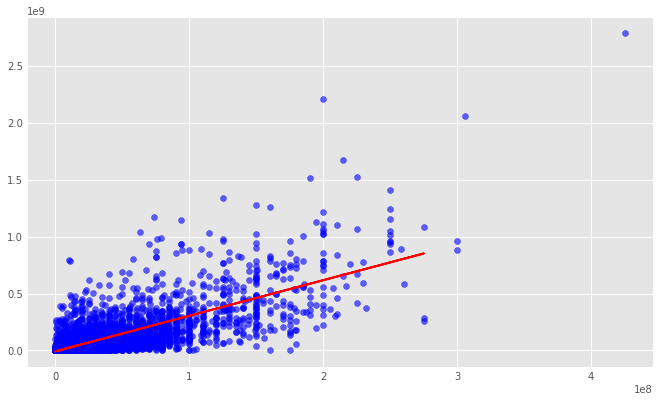

In [36]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='blue', alpha=0.6)
plt.plot(X_test, y_preds, color='red', linewidth=2)
plt.show()
plt.style.use("ggplot")